In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter
import os
import re
import nltk
nltk.download('punkt')
from collections import defaultdict
import ast
from wordcloud import WordCloud
from collections import defaultdict
import matplotlib.pyplot as plt

#LDa, LSA
from gensim.models.phrases import Phraser
from gensim.models import Phrases
import gensim.models as models
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore, LdaModel
from gensim.models import CoherenceModel
from gensim.models import LsiModel


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Topic Modeling




In order to perform the topic modelling task, we will exploit the multiclass, score-labelled subset initially generated for the text classification task. The datasetincludes 89,269 instances.

In [ ]:
# Specify the file path
file_path = '/content/gdrive/MyDrive/Text_Mining_ Project/files_csv/multiclasse_df.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, sep=",")
df

,Tokens_lemma,Score
0,"['lot', 'unopened', 'one', 'lot', 'roasted', '...",1
1,"['ordered', 'oz', 'can', 'received', 'oz', 'ca...",1
2,"['ordered', 'elderly', 'parent', 'another', 's...",1
3,"['disappointed', 'coffee', 'hot', 'chocolate',...",1
4,"['ordered', 'thinking', 'hopping', 'great', 'd...",1
...,...,...
103975,"['natual', 'peanut', 'butter', 'lover', 'love'...",5
103976,"['amazing', 'see', 'may', 'find', 'sweet', 'no...",5
103977,"['dog', 'really', 'enjoy', 'treat', 'low', 'fa...",5
103978,"['one', 'best', 'jasmine', 'white', 'tea', 'ta...",5


# Preparing Data

In [ ]:
# Convert string representations of lists to actual lists
df['Tokens_lemma'] = df['Tokens_lemma'].apply(ast.literal_eval)

In [ ]:
# Initialize a Counter to count token frequencies
token_counter = Counter()

# Count frequencies
for word_list in df['Tokens_lemma']:
    token_counter.update(word_list)
# Create a DataFrame from the sorted_token_counter
df_frequencies = pd.DataFrame(list(token_counter.items()), columns=['Token', 'Frequency'])


In [ ]:
df_frequencies

,Token,Frequency
0,lot,8758
1,unopened,202
2,one,37411
3,roasted,1206
4,pistachio,229
...,...,...
51072,gastronomical,1
51073,bondage,1
51074,manchester,1
51075,farthe,1


In [ ]:
# Filter tokens based on frequency condition
processed_corpus = [token for token in  df['Tokens_lemma']]

we find bigrams and then add them to the original data, because we would like to keep the words “dish” and “soap” as well as the bigram “dish_soap”.


In [ ]:
# Find bigrams (1675 words)
bigram = Phrases(processed_corpus, min_count=50, threshold=0.3, scoring='npmi') #threshold is based on Normalized Pointwise Mutual Information (npmi)
bigram_mod = Phraser(bigram)

# Find trigrams (25 words)
trigram = Phrases(bigram[processed_corpus], min_count=20,  threshold=0.3, scoring='npmi')
trigram_mod = Phraser(trigram)

# Apply bigram and trigram models to the texts
processed_corpus = [bigram_mod[doc] for doc in processed_corpus]
processed_corpus = [trigram_mod[bigram_mod[doc]] for doc in processed_corpus]

we display bigram and trigram

In [ ]:
# Set to store unique bigram words
unique_bigrams = set()

# Iterate over all documents
for idx in range(len(processed_corpus)):
    # Add bigrams to set and print words containing underscores
    words_with_underscore = [token for token in processed_corpus[idx] if '_' in token]
    unique_bigrams.update(words_with_underscore)

# Set to store unique trigram words with two underscores
unique_trigrams = set()

# Iterate over all documents
for idx in range(len(processed_corpus)):
    # Add trigrams to set and print words containing two underscores
    words_with_two_underscores = [token for token in processed_corpus[idx] if token.count('_') == 2]
    unique_trigrams.update(words_with_two_underscores)


In [ ]:
print(len(unique_bigrams))
print(len(unique_trigrams))

5055
319


In [ ]:
sorted_bigrams = sorted(unique_bigrams)

# Display the sorted list
for bigram in sorted_bigrams:
    print(bigram)

Output streaming troncato alle ultime 5000 righe.
aftertaste_mouth
agave_nectar
agave_syrup
aggressive_chewer
agree_another_reviewer
agree_others
agree_previous_reviewer
agree_review
agree_reviewer
ahead_time
ahoy_cooky
air_bubble
air_pillow
air_popper
air_tight
airtight_container
al_dente
albacore_tuna
alfredo_sauce
alka_seltzer
alkaline_water
allergic_peanut
allergic_reaction
allergic_soy
allergic_wheat
allow_return
almond_butter
almond_cashew
almond_flour
almond_milk
almond_paste
almost_entirely
almost_every
almost_exclusively
almost_identical
almost_immediately
almost_impossible
almost_inedible
aloe_vera
along_line
alot_money
alternative_soda
alton_brown
aluminum_foil
always_lookout
always_loved
amazing_grass
amazingly_delicious
american_version
amino_acid
among_best
amount_sodium
amount_sweetness
amy_brian
amy_soup
ancient_harvest
angel_hair
angel_hair_pasta
animal_cracker
animal_digest
animal_fat
animal_product
animal_shelter
annie_chun
annie_homegrown
annie_product
another_brand

In [ ]:
unique_trigrams

{'agree_another_reviewer',
 'agree_previous_reviewer',
 'angel_hair_pasta',
 'another_reviewer_mentioned',
 'another_reviewer_noted',
 'anti_dandruff_shampoo',
 'apple_cider_vinegar',
 'apple_juice_concentrate',
 'arrived_perfect_condition',
 'arrived_timely_fashion',
 'arrived_timely_manner',
 'artificial_sweetener_sucralose',
 'autolyzed_yeast_extract',
 'avid_tea_drinker',
 'back_drawing_board',
 'banana_nut_bread',
 'bed_bath_beyond',
 'best_way_describe',
 'betty_crocker_mix',
 'big_coffee_drinker',
 'big_tea_drinker',
 'blind_taste_test',
 'blood_sugar_level',
 'blue_buffalo_wilderness',
 'bob_red_mill',
 'bpa_free_can',
 'bring_back_old',
 'bring_back_original',
 'brown_rice_flour',
 'brown_rice_pasta',
 'brown_rice_syrup',
 'buy_regular_basis',
 'c_calcium_iron',
 'called_customer_service',
 'calorie_calorie_fat',
 'calorie_per_serving',
 'can_badly_dented',
 'cancelled_subscribe_save',
 'caramel_vanilla_cream',
 'carbonated_fruit_juice',
 'cent_per_ounce',
 'chai_tea_latte',
 

In order to employ LDA and LSa algorithm we need to cerate a dictionary based on corpus

In [ ]:
#Before proceeding, we want to associate each word in the corpus with a unique integer ID.
dictionary = corpora.Dictionary(processed_corpus)

print(f"size: {len(dictionary)}")

size: 56083


Prior to applying filters to the dictionary, we inspect the excluded words and fine-tune the parameters no_below and no_above.

In [ ]:
document_counts = Counter([token_id for doc in processed_corpus for token_id in set(doc)])

In [ ]:
# Create sets for excluded words
excluded_below_set = set()
excluded_above_set = set()

# Iterate over each (token, token_id) in the token2id mapping of the dictionary
for token_id, token in dictionary.items():
    # Count the number of documents in which the word appears at least once
    if token in document_counts:
        freq = document_counts[token]

        # If the word appears in less than 10 documents, add it to excluded_below_set
        if freq < 10: #0.016%
            excluded_below_set.add(token)

        # If the word appears in more than 30% of the documents, add it to excluded_above_set
        if freq / len(processed_corpus) > 0.3:
            excluded_above_set.add(token)

# Update document_counts with the count of unique tokens in the processed_corpus
document_counts = Counter([token_id for doc in processed_corpus for token_id in set(doc)])

# Print or use excluded_below_set and excluded_above_set as needed
print("Excluded below set:", excluded_below_set)
print("Number of words below 10 documents:", len(excluded_below_set))

print("Excluded above set:", excluded_above_set)
print("Number of words above 30% of documents:", len(excluded_above_set))

Excluded below set: {'duro', 'trets', 'mnths', 'odell', 'irresitible', 'tasteappearancecons', 'diped', 'shawarmagyrossushi', 'degenerated', 'restroom', 'loveliness', 'haley', 'palable', 'olewo', 'altenative', 'noy', 'uncut', 'olympic', 'shelfmates', 'whelmingly', 'outflavorful', 'fungused', 'reheats', 'snarf', 'janszoon', 'newmano', 'surveyed', 'goob', 'eay', 'laughably', 'tripped', 'syngenta', 'bariani', 'enacted', 'frappacino', 'tummyand', 'avalable', 'hopi', 'shazz', 'notbad', 'vitamic', 'pinnacale', 'pigskinniest', 'sentenced', 'brashly', 'thumbprint', 'corningware', 'losely', 'bulgaria', 'lunck', 'liquers', 'enourmous', 'reoccurring', 'dunker', 'magnum', 'qwerty', 'riverside', 'jabuticaba', 'notgood', 'sri', 'crayfish', 'yawned', 'moe', 'serval', 'pesco', 'boxesand', 'puffets', 'colouring', 'haribos', 'dumbed', 'mock', 'spicer', 'recommendable', 'tablespoonservings', 'mould', 'priducts', 'exhorbitantly', 'kwaun', 'razz', 'numbs', 'sry', 'unfamiliarity', 'moley', 'overcomplicating'

we adjust the dictionary by excluding words that appear in less than 10 documents or in more than 0.3% of the total number of documents. however, we print these words in the first place

In [ ]:
# we filter the dictionary
dictionary.filter_extremes(no_below=10, no_above=0.3)

In [ ]:
print("Number of unique words in the dictionary:", len(dictionary.token2id))
print("Number of documents:", len(processed_corpus))

Number of unique words in the dictionary: 16617
Number of documents: 103980


To infer the latent structure in our corpus we need a way to represent documents that we can manipulate mathematically.  Initially, we construct  a bag of words model that ignores the order of tokens, and later apply TF-IDF transformation to the entire bag of word corpus as suggested by gensim example [https://radimrehurek.com/gensim/models/ldamodel.html]

In [ ]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
tfidf = models.TfidfModel(bow_corpus)
#apply the TF-IDF transformation to the entire bag-of-words corpus.
tfidf_corpus = tfidf[bow_corpus]

# LDA

Since LDa model uses a probability distribution model to generate topics, each document is assumed to be generated from multiple topics according to a certain random probability distribution, and each topic is composed of words according to a random probability distribution.Thus, a document contains a collection of topics with different probabilities, and a topic contains a collection of words with different probabilities.However, the LDA topic model has a problem that it does not give the optimal number of topics for the text itself.the number of topics must be specified a priori

In [ ]:
%%time
ntopics = list(range(3, 21))

metrics = pd.DataFrame({'topics': ntopics, 'Cv_Coherence': [0.0] * len(ntopics), 'UMASS coherence': [0.0] * len(ntopics)})


for num_topics in range(len(ntopics)):
    lda_model= LdaModel(
        random_state=42,
        alpha='auto',
        eta="auto",
        corpus=bow_corpus,
        chunksize=1000,
        passes = 20,
        id2word=dictionary,
        num_topics=ntopics[num_topics]
    )

    print("Number of topics:", ntopics[num_topics])

    # Calculate Coherence Scores
    metrics['Cv_Coherence'][num_topics] = CoherenceModel(model=lda_model, texts=processed_corpus, dictionary=dictionary, coherence='c_v').get_coherence()
    metrics['UMASS coherence'][num_topics] = CoherenceModel(model=lda_model, texts=processed_corpus, dictionary=dictionary, coherence='u_mass').get_coherence()


 # Print the calculated metrics
    print("Cv_Coherence:", metrics['Cv_Coherence'][num_topics])
    print("UMASS coherence:", metrics['UMASS coherence'][num_topics])

Number of topics: 3
Cv_Coherence: 0.4024685672359853
UMASS coherence: -2.060560746067862


Number of topics: 4
Cv_Coherence: 0.4440566172308406
UMASS coherence: -2.270140731660596


Number of topics: 5
Cv_Coherence: 0.4428165043065637
UMASS coherence: -2.553230604366381
Number of topics: 6
Cv_Coherence: 0.4843780503686892
UMASS coherence: -2.7616417248118204
Number of topics: 7
Cv_Coherence: 0.48393096811527564
UMASS coherence: -2.8092946335742996
Number of topics: 8
Cv_Coherence: 0.42918116072326334
UMASS coherence: -3.6340517019831005
Number of topics: 9
Cv_Coherence: 0.4961054054236841
UMASS coherence: -3.016525891018875
Number of topics: 10
Cv_Coherence: 0.46860984435230674
UMASS coherence: -3.3317455397331592
Number of topics: 11
Cv_Coherence: 0.47077459048797726
UMASS coherence: -4.11155465410096
Number of topics: 12
Cv_Coherence: 0.4900198001225296
UMASS coherence: -3.6567678289807457
Number of topics: 13
Cv_Coherence: 0.4311485278467745
UMASS coherence: -4.176226592300473
Number of topics: 14
Cv_Coherence: 0.4469488593431136
UMASS coherence: -4.018024099480745
Number of topics: 15
Cv_Coherence: 0.4749813399194927
UMASS coherence: -3.8473388100117103
Number

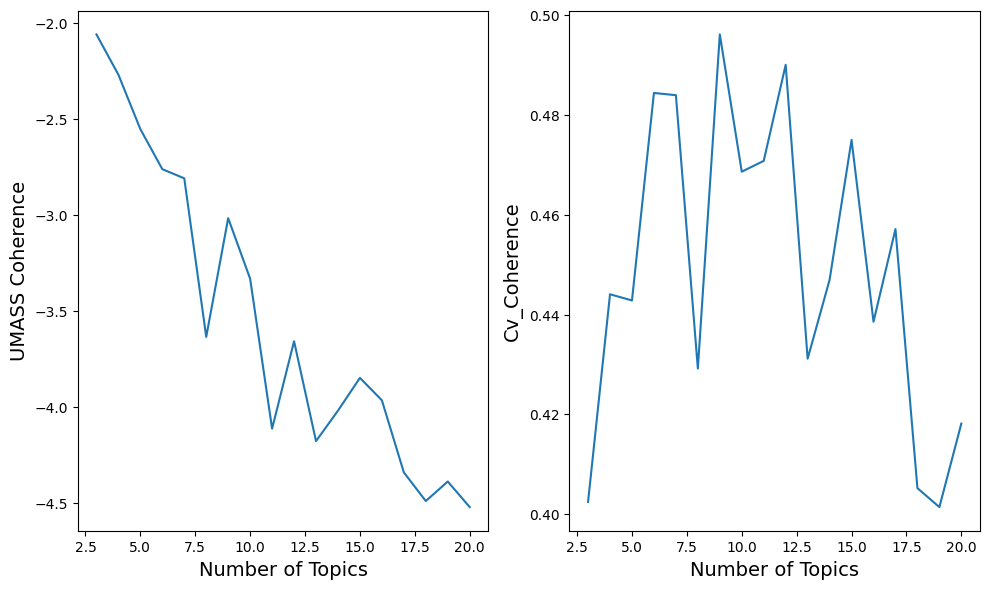

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.plot(metrics["topics"], metrics["UMASS coherence"])
ax2.plot(metrics["topics"], metrics["Cv_Coherence"])

# Add labels and title
ax1.set_xlabel("Number of Topics", fontsize=14)
ax1.set_ylabel("UMASS Coherence", fontsize=14)

ax2.set_xlabel("Number of Topics", fontsize=14)
ax2.set_ylabel("Cv_Coherence", fontsize=14)



plt.tight_layout()
plt.show()


Considering the quantitative metrics, a trade-off between the two values can be observed with the 9-topic model, where a Cv\_Coherence of 0.54 and a U\_mass Coherence of -2.93 are achieved.

In [ ]:
# Number of topics
num_topics = 9

# Create LDA model
lda_model = LdaModel(
    corpus=bow_corpus,
    chunksize=1000,
    passes=20,
    id2word=dictionary,
    num_topics=num_topics,
    alpha='auto',
    eta='auto',
    random_state=42
)

# Print Coherence Scores
print("Cv_Coherence:", CoherenceModel(model=lda_model, texts=processed_corpus, dictionary=dictionary, coherence='c_v').get_coherence())
print("UMASS coherence:", CoherenceModel(model=lda_model, texts=processed_corpus, dictionary=dictionary, coherence='u_mass').get_coherence())

# Save the model
lda_model.save('lda.model')

Cv_Coherence: 0.4961054054236841
UMASS coherence: -3.016525891018875


In [ ]:
lda_model_topics = lda_model.show_topics(num_topics=9, num_words=10)

for topic, words in lda_model_topics:
    print(f"Topic {topic}: {words}")

Topic 0: 0.041*"taste" + 0.040*"flavor" + 0.033*"like" + 0.029*"good" + 0.024*"tea" + 0.017*"make" + 0.014*"use" + 0.011*"add" + 0.011*"tried" + 0.010*"sweet"
Topic 1: 0.035*"sugar" + 0.029*"organic" + 0.023*"healthy" + 0.023*"cereal" + 0.021*"ingredient" + 0.021*"natural" + 0.015*"calorie" + 0.014*"fruit" + 0.014*"diet" + 0.013*"honey"
Topic 2: 0.026*"oil" + 0.022*"pasta" + 0.021*"cooking" + 0.016*"green" + 0.014*"color" + 0.014*"coconut" + 0.014*"water" + 0.013*"white" + 0.012*"red" + 0.012*"seed"
Topic 3: 0.031*"one" + 0.028*"great" + 0.024*"love" + 0.018*"get" + 0.011*"good" + 0.011*"time" + 0.010*"like" + 0.010*"bag" + 0.010*"even" + 0.009*"well"
Topic 4: 0.051*"price" + 0.046*"buy" + 0.038*"best" + 0.036*"brand" + 0.028*"store" + 0.022*"pack" + 0.019*"quality" + 0.018*"bottle" + 0.018*"buying" + 0.017*"le"
Topic 5: 0.023*"recipe" + 0.023*"meal" + 0.022*"rice" + 0.018*"cook" + 0.018*"bread" + 0.017*"mix" + 0.017*"chicken" + 0.017*"gluten_free" + 0.015*"use" + 0.013*"cake"
Topic 6:

## Results visualization

 the relevance metric (λ or lambda) is used to balance two factors when selecting the top terms for each topic:how much more probable a term is within a topic compared to its overall probability in the corpus  and the overall probability of the term in the corpus.

In [ ]:
!pip install pyldavis
!pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 32.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [ ]:
pyLDAvis.enable_notebook()
LDAvis_lda  = gensimvis.prepare(lda_model, tfidf_corpus, dictionary, sort_topics=True)
LDAvis_lda

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.277766 -0.076474       1        1  31.572961
0      0.221934 -0.131973       2        1  22.560216
6      0.155749  0.090063       3        1  13.936863
4     -0.061993  0.215744       4        1   8.119025
1     -0.071184  0.249245       5        1   5.964811
7      0.013831  0.119255       6        1   5.424834
8     -0.214749 -0.094673       7        1   4.319104
5     -0.057675 -0.253556       8        1   4.259028
2     -0.263679 -0.117630       9        1   3.843159, topic_info=             Term         Freq        Total Category  logprob  loglift
96         coffee  2741.000000  2741.000000  Default  30.0000  30.0000
83          taste  4388.000000  4388.000000  Default  29.0000  29.0000
288        flavor  4335.000000  4335.000000  Default  28.0000  28.0000
9             one  4683.000000  4683.000000  Default  27.0000  27.0000
22           food  1713.000000  1713.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
3737  traditional    93.806221   100.414474   Topic9  -5.2791   3.1908
3358        shape   111.865374   128.353749   Topic9  -5.1030   3.1214
363        canned   123.594598   160.074147   Topic9  -5.0033   3.0002
282         water   250.330418  1030.228146   Topic9  -4.2975   1.8441
1611        light    90.956431   365.288814   Topic9  -5.3099   1.8686

[430 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
361       2  0.988812       add
361       8  0.011255       add
428       2  1.000548    adding
1992      6  1.000583       age
2640      5  0.084122   allergy
...     ...       ...       ...
185       3  0.999712      year
1836      3  1.001834  year_ago
354       6  0.999648  year_old
3556      4  1.001868       yum
2676      1  0.998454     yummy

[537 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 7, 5, 2, 8, 9, 6, 3])

To visualise the result, we generated WordCloud based on
the word weights for each topic. The weights were computed
using the γ parameter, set to 0.6, which is used to balance
two factors: the probability of a term within a topic against its
overall probability in the corpus and the overall probability of
the term in the corpus in the pyLDAvis library.

Then, we assign each topic a label that we believe briefly captures its essence

In [ ]:
# Extract relevant columns from topic_info
selected_columns = [ 'Term', 'Freq', 'Total', 'Category', 'logprob', 'loglift']
topic_info_df = LDAvis_lda.topic_info[selected_columns]

# Create a DataFrame
topics_df = pd.DataFrame(topic_info_df)
# Calculate the new column 'slide_value'
topics_df['slide_value'] = (0.4) * topics_df['loglift'] + 0.6 * topics_df['logprob']
topics_df = topics_df[topics_df['Category'] != 'Default']
# Display the DataFrame

# Find the index of the row with the term "tea" in the 'Term' column
tea_index = topics_df[topics_df['Term'] == 'coffee'].index

# Update the 'slide_value' for the term "tea" to its negative value
topics_df.loc[tea_index, 'slide_value'] = -topics_df.loc[tea_index, 'slide_value']

topics_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Term,Freq,Total,Category,logprob,loglift,slide_value
115,bag,1465.867619,1465.993844,Topic1,-4.6361,1.1528,-2.32054
287,first,1130.412820,1130.539052,Topic1,-4.8960,1.1528,-2.47648
302,thing,1077.750594,1077.876818,Topic1,-4.9437,1.1528,-2.50510
348,snack,965.283066,965.409279,Topic1,-5.0539,1.1527,-2.57126
1656,chocolate,961.452478,961.578690,Topic1,-5.0579,1.1527,-2.57366
...,...,...,...,...,...,...,...
3737,traditional,93.806221,100.414474,Topic9,-5.2791,3.1908,-1.89114
3358,shape,111.865374,128.353749,Topic9,-5.1030,3.1214,-1.81324
363,canned,123.594598,160.074147,Topic9,-5.0033,3.0002,-1.80190
282,water,250.330418,1030.228146,Topic9,-4.2975,1.8441,-1.84086


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




We Generate a wordcloud for each topic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



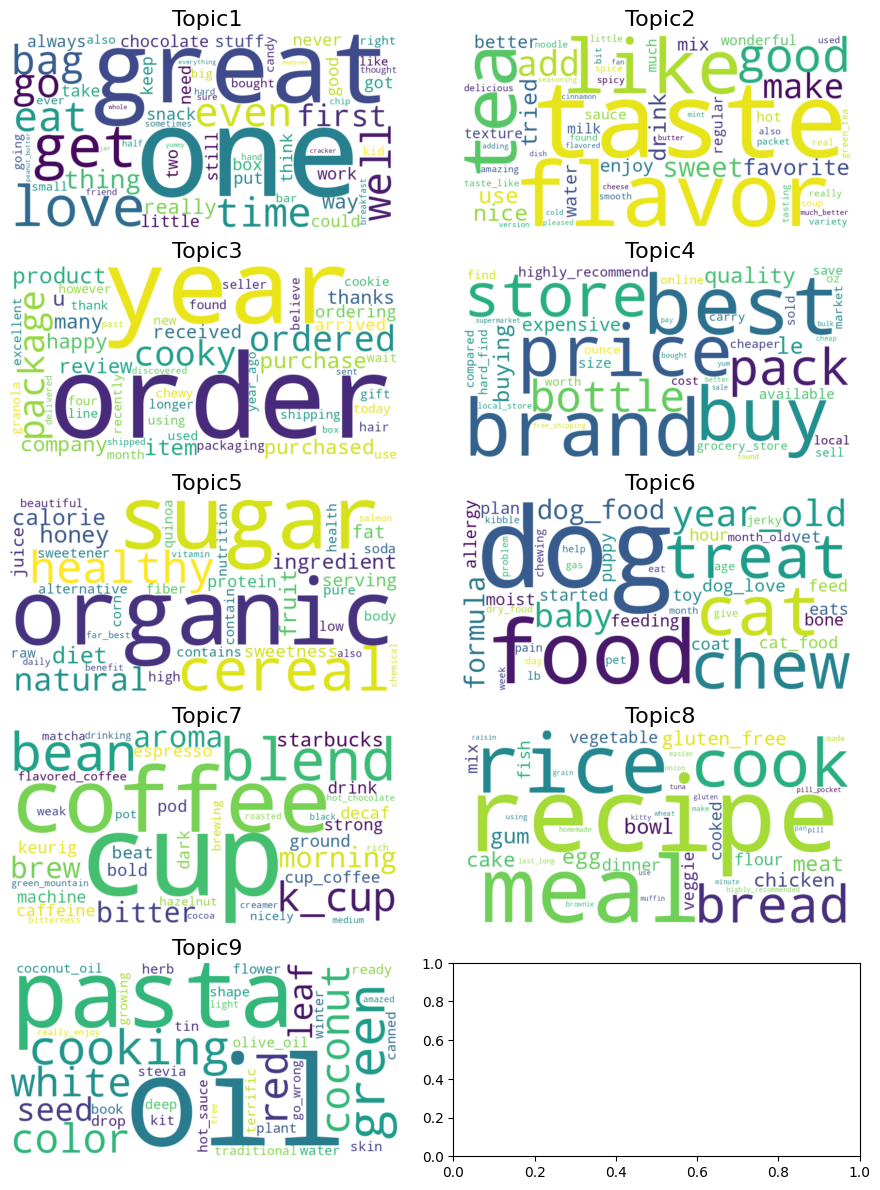

In [ ]:
topic_terms = defaultdict(list)

# Iterate over the DataFrame to populate the dictionary
for index, row in topics_df.iterrows():
    category = row['Category']
    term = row['Term']
    slide_value = row['slide_value']
    topic_terms[category].append((term, slide_value))

# Create subplots in a 5x2 grid
fig, ax = plt.subplots(5, 2, figsize=(9, 12))

# Flatten the axis array for easier iteration
ax = ax.flatten()

# Create a word cloud for each category and plot it on a subplot
for i, (category, terms) in enumerate(topic_terms.items()):

        wordcloud_data = {term: slide_value for term, slide_value in terms}


        # Create the WordCloud object using word frequencies as weights
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

        # Plot the WordCloud on the i-th subplot
        ax[i].imshow(wordcloud, interpolation='bilinear')
        ax[i].set_title(f" {category}",fontsize=16 )
        ax[i].axis('off')

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()


# LSA

LSA is a dimensionality reduction technique used in natural language processing and information retrieval. It involves applying singular value decomposition (SVD) to a term-document matrix to identify the underlying structure and relationships between terms and documents. The number of dimensions in the reduced space corresponds to the number of topics.



In [ ]:
%%time
# Train LSI models with different numbers of topics
ntopics = list(range(3, 21))

metrics = pd.DataFrame({'topics': ntopics, 'Cv_Coherence': [0.0] * len(ntopics), 'UMASS coherence': [0.0] * len(ntopics)})

for num_topics in range(len(ntopics)):
    lsi_model = LsiModel(
        corpus=tfidf_corpus,
        id2word=dictionary,
        num_topics=ntopics[num_topics],
        random_seed=42,
        chunksize=1000
    )

    print("Number of topics:", ntopics[num_topics])

    # Calculate Coherence Scores
    metrics['Cv_Coherence'][num_topics] = CoherenceModel(model=lsi_model, texts=processed_corpus, dictionary=dictionary, coherence='c_v').get_coherence()
    metrics['UMASS coherence'][num_topics] = CoherenceModel(model=lsi_model, texts=processed_corpus, dictionary=dictionary, coherence='u_mass').get_coherence()

    # Print the calculated metrics
    print("Cv_Coherence:", metrics['Cv_Coherence'][num_topics])
    print("UMASS coherence:", metrics['UMASS coherence'][num_topics])

Number of topics: 3
Cv_Coherence: 0.4834823555421664
UMASS coherence: -2.5090695376430165
Number of topics: 4
Cv_Coherence: 0.35955175050219845
UMASS coherence: -3.1780630041205136
Number of topics: 5
Cv_Coherence: 0.38196281560856776
UMASS coherence: -2.793896551492078
Number of topics: 6
Cv_Coherence: 0.39012462642189666
UMASS coherence: -2.9715807090079642
Number of topics: 7
Cv_Coherence: 0.38103537037995283
UMASS coherence: -2.916157876721793
Number of topics: 8
Cv_Coherence: 0.3680355889860082
UMASS coherence: -3.044576087753218
Number of topics: 9
Cv_Coherence: 0.3643434027209754
UMASS coherence: -3.238406129855006
Number of topics: 10
Cv_Coherence: 0.35495250277435175
UMASS coherence: -3.122591457872552
Number of topics: 11
Cv_Coherence: 0.3623495102031276
UMASS coherence: -3.11593419899982
Number of topics: 12
Cv_Coherence: 0.33968154572066944
UMASS coherence: -3.1252706109553654
Number of topics: 13
Cv_Coherence: 0.33746691491611525
UMASS coherence: -3.1644840402376957
Number

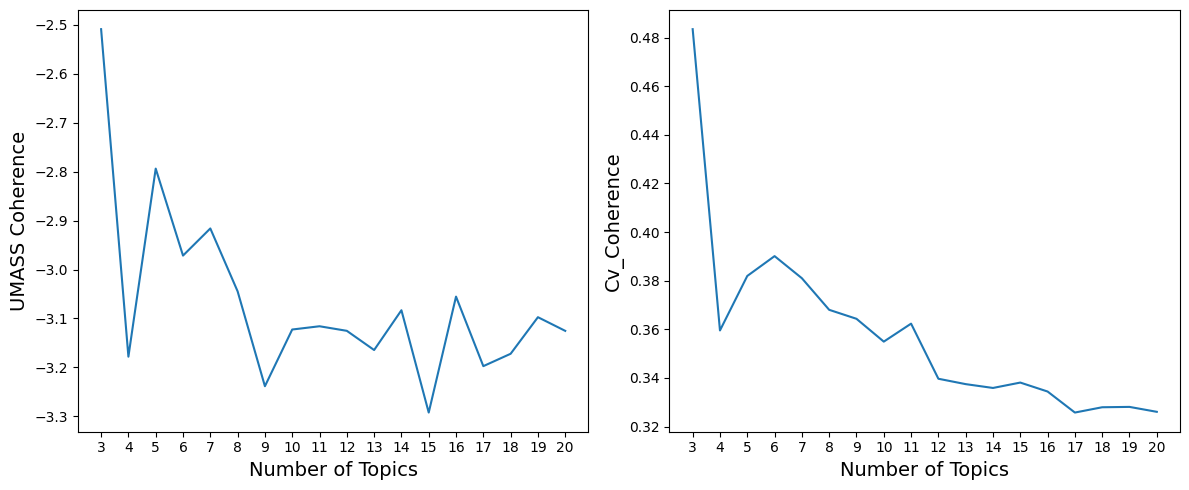

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # Increase the figure size

ax1.plot(metrics["topics"], metrics["UMASS coherence"])
ax2.plot(metrics["topics"], metrics["Cv_Coherence"])

# Set x-ticks to only display integer values
ax1.set_xticks(metrics["topics"])
ax2.set_xticks(metrics["topics"])

# Add labels and title with larger font size
ax1.set_xlabel("Number of Topics", fontsize=14)
ax1.set_ylabel("UMASS Coherence", fontsize=14)

ax2.set_xlabel("Number of Topics", fontsize=14)
ax2.set_ylabel("Cv_Coherence", fontsize=14)

# Set x-ticks to only display integer values
plt.xticks(metrics["topics"], [int(topic) for topic in metrics["topics"]])

plt.tight_layout()
plt.show()


Considering the quantitative metrics, a trade-off between the two values can be observed with the 6-topic model, where a Cv_Coherence of 0.39 and a U_mass Coherence of -2.97 are achieved.

In [ ]:
# Number of topics
num_topics = 6

# Create LDA model
lsi_model = LsiModel(
        corpus=tfidf_corpus,
        id2word=dictionary,
        num_topics= num_topics ,
        random_seed=42,
        chunksize=1000
)

# Print Coherence Scores
print("Cv_Coherence:", CoherenceModel(model=lsi_model, texts=processed_corpus, dictionary=dictionary, coherence='c_v').get_coherence())
print("UMASS coherence:", CoherenceModel(model=lsi_model, texts=processed_corpus, dictionary=dictionary, coherence='u_mass').get_coherence())

# Save the model
lsi_model.save('lsi.model')

Cv_Coherence: 0.39012462642189666
UMASS coherence: -2.9715807090079642


In [ ]:
lsi_model_topics = lda_model.show_topics(num_topics=6, num_words=50)

lsi_model_topics = [(f"Topic {i + 1}", words) for i, (topic, words) in enumerate(lsi_model_topics)]
for topic, words in lsi_model_topics:
    print(f"{topic}: {words}")

Topic 1: 0.026*"oil" + 0.022*"pasta" + 0.021*"cooking" + 0.016*"green" + 0.014*"color" + 0.014*"coconut" + 0.014*"water" + 0.013*"white" + 0.012*"red" + 0.012*"seed" + 0.011*"leaf" + 0.011*"olive_oil" + 0.010*"drop" + 0.009*"coconut_oil" + 0.008*"skin" + 0.008*"stevia" + 0.008*"plant" + 0.007*"tin" + 0.007*"canned" + 0.006*"ready" + 0.006*"hot_sauce" + 0.006*"shape" + 0.006*"herb" + 0.006*"kit" + 0.006*"flower" + 0.005*"terrific" + 0.005*"winter" + 0.005*"book" + 0.005*"traditional" + 0.005*"light" + 0.005*"deep" + 0.005*"minute" + 0.005*"growing" + 0.005*"pot" + 0.005*"go_wrong" + 0.004*"really_enjoy" + 0.004*"black" + 0.004*"tree" + 0.004*"amazed" + 0.004*"pumpkin" + 0.004*"pie" + 0.004*"fried" + 0.004*"smoothie" + 0.004*"brown" + 0.004*"gallon" + 0.004*"grow" + 0.004*"yellow" + 0.004*"bargain" + 0.003*"spinach" + 0.003*"complex"
Topic 2: 0.133*"coffee" + 0.053*"cup" + 0.023*"blend" + 0.019*"bean" + 0.018*"drink" + 0.018*"morning" + 0.018*"k_cup" + 0.015*"bitter" + 0.015*"strong" + 0

We assign each topic a label that we believe briefly captures its essence.

In [ ]:
# Create a dictionary to store the data
topic_terms = defaultdict(list)

# Iterate over the topics list to populate the dictionary (category is used to associate each word with its corresponding topic number)
for index, (category, words) in enumerate(lsi_model_topics):
    words_list = [word.strip('\"') for word in words.split(" + ")] #split by + and remove double quotes
    for word in words_list:
        word_parts = word.split("*")
        weight = float(word_parts[0])
        word = word_parts[1].strip('"')
        topic_terms['Category'].append(category)
        topic_terms['Term'].append(word)
        topic_terms['Weight'].append(weight)

# Create a DataFrame from the dictionary
df = pd.DataFrame(topic_terms)

df

,Category,Term,Weight
0,Topic 1,oil,0.026
1,Topic 1,pasta,0.022
2,Topic 1,cooking,0.021
3,Topic 1,green,0.016
4,Topic 1,color,0.014
...,...,...,...
295,Topic 6,make,0.004
296,Topic 6,bar,0.004
297,Topic 6,ever,0.004
298,Topic 6,perfect,0.004


## Results visualization

We Generate a wordcloud for each topic

In [ ]:
topic_terms

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



defaultdict(list,
            {'Topic 1': [('oil', 0.026),
              ('pasta', 0.022),
              ('cooking', 0.021),
              ('green', 0.016),
              ('color', 0.014),
              ('coconut', 0.014),
              ('water', 0.014),
              ('white', 0.013),
              ('red', 0.012),
              ('seed', 0.012),
              ('leaf', 0.011),
              ('olive_oil', 0.011),
              ('drop', 0.01),
              ('coconut_oil', 0.009),
              ('skin', 0.008),
              ('stevia', 0.008),
              ('plant', 0.008),
              ('tin', 0.007),
              ('canned', 0.007),
              ('ready', 0.006),
              ('hot_sauce', 0.006),
              ('shape', 0.006),
              ('herb', 0.006),
              ('kit', 0.006),
              ('flower', 0.006),
              ('terrific', 0.005),
              ('winter', 0.005),
              ('book', 0.005),
              ('traditional', 0.005),
              ('light', 0.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



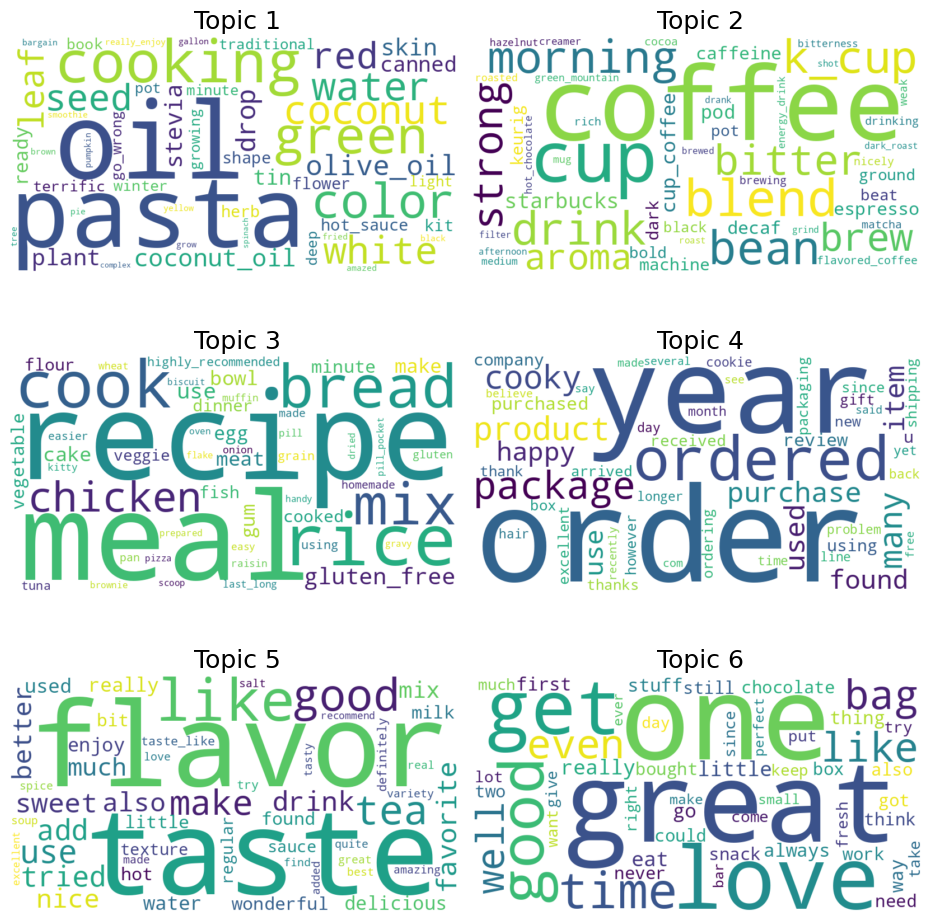

In [ ]:
topic_terms = defaultdict(list)

# Iterate over the DataFrame to populate the dictionary
for index, row in df.iterrows():
    category = row['Category']
    term = row['Term']
    slide_value = row['Weight']
    topic_terms[category].append((term, slide_value))

# Create subplots in a
fig, ax = plt.subplots(3, 2, figsize=(9.4, 10))

# Flatten the axis array for easier iteration
ax = ax.flatten()

# Create a word cloud for each category and plot it on a subplot
for i, (category, terms) in enumerate(topic_terms.items()):

        wordcloud_data = {term: slide_value for term, slide_value in terms}


        # Create the WordCloud object using word frequencies as weights
        wordcloud = WordCloud(width=800, height=420, background_color='white').generate_from_frequencies(wordcloud_data)

        # Plot the WordCloud on the i-th subplot
        ax[i].imshow(wordcloud, interpolation='bilinear')
        ax[i].set_title(f" {category}", fontsize=18)
        ax[i].axis('off')

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()


# BertTopic

BERTopic is a topic modeling technique that leverages  transformers and TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions.


We set language to english since our documents are in the English language and we employ the default embedding model  `all-MiniLM-L6-v2`.

In [ ]:
!pip install -q bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic

In [ ]:
# Assuming train_texts is a list of lists where each inner list represents tokens
train = [' '.join(tokens) for tokens in processed_corpus]
print(f"first document:{train[0]}")

first document:lot unopened one lot roasted pistachio dark_brown meat much expensive one atthe local_supermarket charge much shipping way bad customer_service one


In [ ]:
%%time
topic_model = BERTopic(language='english', embedding_model='paraphrase-MiniLM-L6-v2', calculate_probabilities=True, verbose=True, nr_topics=30)
topics, probs = topic_model.fit_transform(train)

2023-12-29 07:38:58,877 - BERTopic - Embedding - Transforming documents to embeddings.


.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/3250 [00:00<?, ?it/s]

2023-12-29 08:33:59,533 - BERTopic - Embedding - Completed ✓
2023-12-29 08:33:59,536 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-29 08:37:28,578 - BERTopic - Dimensionality - Completed ✓
2023-12-29 08:37:28,586 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-29 12:32:15,808 - BERTopic - Cluster - Completed ✓
2023-12-29 12:32:15,826 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-29 12:32:27,394 - BERTopic - Representation - Completed ✓
2023-12-29 12:32:27,399 - BERTopic - Topic reduction - Reducing number of topics
2023-12-29 12:32:36,845 - BERTopic - Topic reduction - Reduced number of topics from 797 to 30


CPU times: user 4h 49min 55s, sys: 1min 46s, total: 4h 51min 42s
Wall time: 4h 53min 39s


we take a look at the most frequent topics.  -1 refers to all outliers and should typically be ignored.



In [ ]:
freq = topic_model.get_topic_info()
freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,46289,-1_not_coffee_taste_like,"[not, coffee, taste, like, flavor, good, one, ...",[saw particular bag coffee pop highly search r...
1,0,41443,0_not_tea_taste_flavor,"[not, tea, taste, flavor, like, good, one, rea...",[mocktails mojito powdered drink similar cryst...
2,1,9042,1_dog_cat_treat_food,"[dog, cat, treat, food, not, dog_food, one, ea...",[really surprised dog actually seemed like usu...
3,2,2698,2_order_price_item_box,"[order, price, item, box, gift, not, received,...",[delivered time delicious expected however acc...
4,3,1631,3_bag_wine_box_not,"[bag, wine, box, not, bottle, can, chip, kit, ...",[first san pellegrino sparkling fruit beverage...
5,4,1347,4_plant_seed_tree_flower,"[plant, seed, tree, flower, bonsai, sprout, no...",[bought deck container year not really impress...
6,5,554,5_trap_moth_mole_squirrel,"[trap, moth, mole, squirrel, fly, work, fence,...",[nothing trap moth followed_direction put four...
7,6,402,6_mushroom_garlic_tomato_balsamic_vinegar,"[mushroom, garlic, tomato, balsamic_vinegar, b...",[love mushroom eating life fresh dried brined ...
8,7,76,7_star_review_star_rating_not,"[star, review, star_rating, not, comment, one_...",[got absolutely_nothing taste decent not worth...
9,8,60,8_arsenic_bpa_formula_brown_rice_syrup,"[arsenic, bpa, formula, brown_rice_syrup, orga...",[looking formula month_old twin shocked learn ...


We can also reduce the number of topics after having trained a BERTopic model. The advantage  is reduce the number of topics

In [ ]:
topic_model.get_topic(0)  # Select the most frequent topic

[('not', 0.024041107914189383),
 ('tea', 0.01992649989567064),
 ('taste', 0.018294557095725986),
 ('flavor', 0.0172369225716562),
 ('like', 0.016371539437876906),
 ('good', 0.014889969248960985),
 ('one', 0.01308124760960291),
 ('really', 0.010332637978596257),
 ('great', 0.010007083456407443),
 ('coffee', 0.009796790688189564)]

## Visualizations

In [ ]:
topic_model.visualize_heatmap()

We visualize the top terms for a few topics by creating bar charts out of the c-TF-IDF scores for each topic representation

In [ ]:
topic_model.visualize_barchart()

## Topic Reduction

we choose to reduce the number of topics  randomly to 7

In [ ]:
%%time
topic_model.reduce_topics(train, nr_topics=8)

2023-12-29 12:56:31,522 - BERTopic - Topic reduction - Reducing number of topics
2023-12-29 12:56:42,032 - BERTopic - Topic reduction - Reduced number of topics from 30 to 8


CPU times: user 10.1 s, sys: 115 ms, total: 10.2 s
Wall time: 10.9 s


In [ ]:
freq1 = topic_model.get_topic_info()
freq1

,Topic,Count,Name,Representation,Representative_Docs
0,-1,46289,-1_not_taste_like_coffee,"[not, taste, like, coffee, flavor, one, good, ...",[firstly prefer bean roasted slightly darker m...
1,0,57564,0_not_like_taste_one,"[not, like, taste, one, flavor, good, tea, dog...",[year_old kid not like neither wife not bad no...
2,1,59,1_movie_beetlejuice_burton_dvd,"[movie, beetlejuice, burton, dvd, film, ghost,...",[last_night movie though try something little ...
3,2,19,2_gas_station_gas_burden_expensive,"[gas_station, gas, burden, expensive, buy, str...",[buy cent gas_station grocery_store seriously ...
4,3,14,3_que_de_producto_para,"[que, de, producto, para, el, muy, lo, la, agr...",[estas pinturas son muy bonitas sin embargo la...
5,4,13,4_yeast_fermentation_lager_wyeast,"[yeast, fermentation, lager, wyeast, strain, m...",[made two box far time yeast gave poor result ...
6,5,12,5_woman_proflowers_rush_limbaugh,"[woman, proflowers, rush, limbaugh, support, s...",[proflowers one two major advertiser continued...
7,6,10,6_cereal_expiration_date_six_april,"[cereal, expiration_date, six, april, package,...",[ordered box cereal order received well prepar...


## Result visualizations

We visualize the top terms for a few topics by creating bar charts out of the c-TF-IDF scores for each topic representation

In [ ]:
topic_model.visualize_barchart()

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topic_model.save("bert_model")

2023-12-29 12:32:41,104 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


To calculate the consistency metrics U_mass and C_v, we use the code provided by Maarten Grootendorst, the author of BERTopic. The code in question can be found in this answer: https://github.com/MaartenGr/BERTopic/issues/90.

In [ ]:
documents = pd.DataFrame({"Document": train,
                          "ID": range(len(train)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_train = topic_model._preprocess_text(documents_per_topic.Document.values)


In [ ]:
documents[:10]

,Document,ID,Topic
0,lot unopened one lot roasted pistachio dark_br...,0,0
1,ordered oz_can received oz_can called petcare ...,1,1
2,ordered elderly parent another state special c...,2,-1
3,disappointed coffee hot_chocolate made plastic...,3,-1
4,ordered thinking hopping great_deal mean bag c...,4,-1
5,wish_could rated higher respect newman philant...,5,0
6,people allergic caffeine please update importa...,6,-1
7,ordered item th not shipped th way behind esti...,7,-1
8,bisque defined thick cream soup made shellfish...,8,-1
9,people watch buying online ordered bottle n_e ...,9,-1


In [ ]:
documents_per_topic[:10]

,Topic,Document
0,-1,ordered elderly parent another state special c...
1,0,lot unopened one lot roasted pistachio dark_br...
2,1,ordered oz_can received oz_can called petcare ...
3,2,wonderful highly priced line not always le_exp...
4,3,not shipped correctly pay lot_money soggy box ...
5,4,beauty received slowly surely started lose lea...
6,5,put several location ant seem mosey around rea...
7,6,suckered buying one saw store one time said sa...
8,7,really_wanted like especially reading_review n...
9,8,search arsenic baby_formula see result study s...


In [ ]:
# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

In [ ]:
# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(train) for train in cleaned_train]
dictionary = corpora.Dictionary(tokens) #56059
corpus = [dictionary.doc2bow(token) for token in tokens]

# Extract terms for each topic and preprocess them for CoherenceModel
topic_words = topic_model.get_topic_info()["Representation"]

In [ ]:
topic_words

0    [not, taste, like, coffee, flavor, one, good, ...
1    [not, like, taste, one, flavor, good, tea, dog...
2    [movie, beetlejuice, burton, dvd, film, ghost,...
3    [gas_station, gas, burden, expensive, buy, str...
4    [que, de, producto, para, el, muy, lo, la, agr...
5    [yeast, fermentation, lager, wyeast, strain, m...
6    [woman, proflowers, rush, limbaugh, support, s...
7    [cereal, expiration_date, six, april, package,...
Name: Representation, dtype: object

In [ ]:
print("Cv_coherence:", CoherenceModel(topics=topic_words,  texts=tokens,corpus=corpus,  dictionary=dictionary, coherence='c_v').get_coherence())
print("UMASS coherence:", CoherenceModel(topics=topic_words,  texts=tokens,corpus=corpus,  dictionary=dictionary, coherence='u_mass').get_coherence())

Cv_coherence: 0.607700583388554
UMASS coherence: -0.4293320755510993
